# Introduction to geospatial vector data in Python

In [68]:
%matplotlib inline

import pandas as pd
import geopandas

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) databases.

We can use the GeoPandas library to read many of those file formats, using the `geopandas.read_file` function.

Here, we are reading a shapefile with all the countries of the world which is a `.zipfile` from our `/data` directory).

In [69]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [73]:
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas, to display the columns's headings.
- There is a 'geometry' column and the different countries are represented as polygons;
- We can use the `.plot()` method to quickly get a *basic* visualization of the data.

<AxesSubplot:>

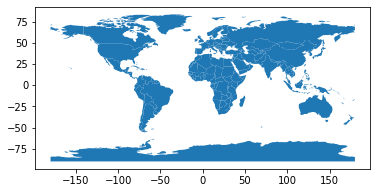

In [74]:
countries.plot()

We can use the in built `type()` function of python to find more info about 'countries'

In [75]:
type(countries)

geopandas.geodataframe.GeoDataFrame

## What's a GeoDataFrame?

A GeoDataFrame is a tabular, geospatial dataset. This means that:
* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** that describe each of the geometries;

* Applying a `.geometry` attribute on a `GeoDataFrame` always returns the column with the geometry information, even if the column name itself is not named 'geometry';
* A `GeoDataFrame` has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks.

In [76]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [77]:
countries.geometry.area

<ipython-input-77-68baff36b7de>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [78]:
countries['pop_est'].sum()

7383089462.0

In [79]:
countries[countries['continent'] == 'Africa']['pop_est'].sum()

1219176238.0

In [80]:
countries[countries['name'] == 'South Africa']['pop_est'].sum()

54841552.0

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [81]:
africa = countries[countries['continent'] == 'Africa']

<AxesSubplot:>

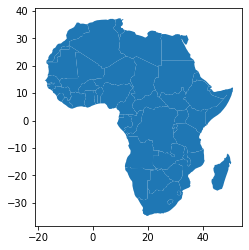

In [82]:
africa.plot()

In [83]:
asia = countries[countries['continent'] == 'Asia']
asia.plot()

<AxesSubplot:>

<div class="alert alert-info" style="font-size:120%">

**REMEMBER:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

## Types of spatial vectors: Points, Linestrings and Polygons

Spatial **vectors** data consist of different types, and the 3 fundamental types are:

![](img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

For the example we have seen up to now, the individual geometry objects are Polygons:

In [85]:
print(countries.geometry[3])

POLYGON ((51.57951867046327 24.24549713795111, 51.75744062684419 24.29407298430547, 51.79438927593287 24.01982615813251, 52.57708051942561 24.17743927662271, 53.40400678896015 24.15131684009917, 54.00800092958758 24.12175792082822, 54.69302371604863 24.79789236093509, 55.43902469261414 25.43914520924494, 56.07082075381456 26.05546417897398, 56.26104170108096 25.71460643157677, 56.396847365144 24.92473216399549, 55.88623253766801 24.92083059335745, 55.8041186867562 24.26960419361529, 55.98121382022046 24.13054291431786, 55.52863162620824 23.9336040308535, 55.52584109886448 23.52486928964093, 55.23448937360288 23.11099274341532, 55.20834109886319 22.70832998299705, 55.00680301292491 22.49694753670714, 52.00073327007433 23.00115448657894, 51.61770755392698 24.01421926522883, 51.57951867046327 24.24549713795111))


Let's import some other datasets with different types of geometry objects.

In [86]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [87]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


In [88]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [89]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [90]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [91]:
from shapely.geometry import Point, Polygon, LineString

In [92]:
p = Point(0, 0)

In [93]:
print(p)

POINT (0 0)


In [94]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [95]:
polygon.area

0.5

In [96]:
polygon.distance(p)

1.4142135623730951

## Plotting our different layers together

<AxesSubplot:>

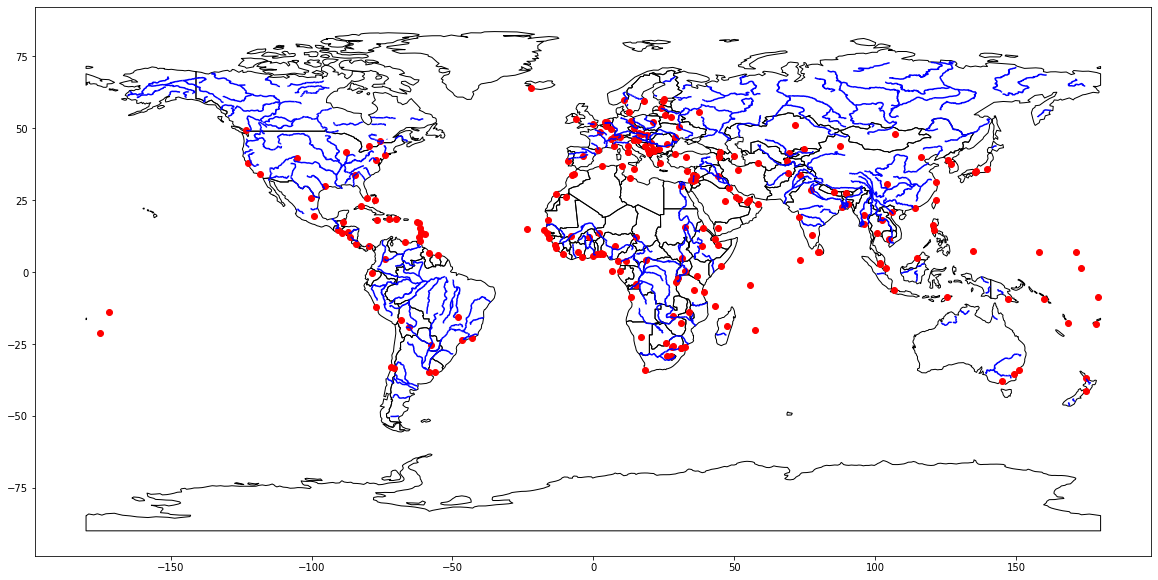

In [105]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(20, 15))
rivers.plot(ax=ax, color='blue')
cities.plot(ax=ax, color='red')
#ax.set(xlim=(-20, 60), ylim=(-40, 40))

[(-20.0, 60.0), (-40.0, 40.0)]

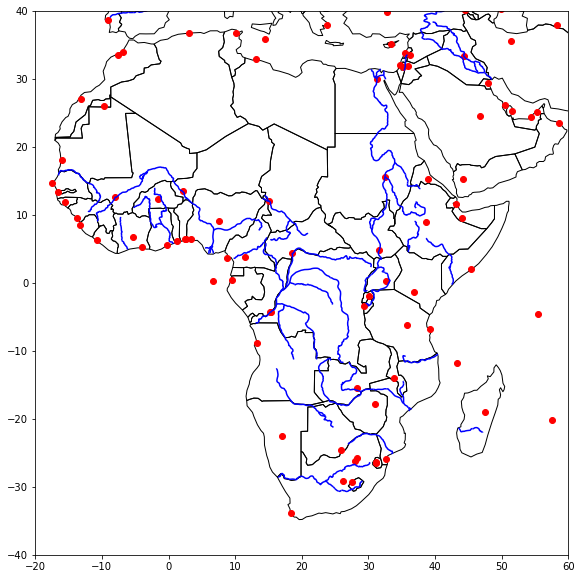

In [106]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax, color='blue')
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided as  files.

Let's explore those datasets:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object (with `type(..)`)
* Check the first rows of the dataframes. What kind of geometries dooes this datasets contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
    
<details><summary>Hints</summary>

* The geopandas.read_file() function can read different geospatial file formats. You pass the file name as first argument.

</details>
    
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data1.py
stations = geopandas.read_file("data/paris_bike_stations_mercator.gpkg")

In [26]:
# %load _solved/solutions/01-introduction-geospatial-data2.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data3.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data4.py

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger byt setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data5.py

A plot with just some points can be hard to interpret without any spatial context. Therefore, in the next exercise we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.




<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data6.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data7.py

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data8.py

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data9.py

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data10.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data11.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data12.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data13.py

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assing values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data14.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data15.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data16.py

<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data17.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data18.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data19.py